In [1]:
%load_ext autoreload
%autoreload 2

import nest_asyncio
nest_asyncio.apply()  # Jupyter Notebook에서 asyncio 실행 문제 해결

In [2]:
from watson.watson import Watson

PROJECT ROOT: C:\Users\Sapphire\Documents\Gachon\P_Project\Retriever_backend


[2025-02-23 00:11:56.967]  DEBUG  from base.py in \Modules\watson\rag: 챗봇이 호출되었습니다. Chatbot ID: 955956081214299624, Channel IDs: None, Scope: None
[2025-02-23 00:11:56.968]  DEBUG  from base.py in \Modules\watson\rag: 메모리에 새로운 챗봇을 로드합니다. Chatbot ID: 955956081214299624
[2025-02-23 00:11:57.480]  INFO  from vectorstore.py in \Modules\watson\rag: The reference data of local vectorstore is same with channel data. Reuse local vectorstore. (Local Path: C:\Users\Sapphire\Documents\Gachon\P_Project\Retriever_backend\Modules\watson\rag\local_vectorstore\955956081214299624)
[2025-02-23 00:11:57.529]  DEBUG  from graph.py in \Modules\watson\rag: Built a new LangGraph Workflow.
[2025-02-23 00:11:57.550]  DEBUG  from base.py in \Modules\watson\rag: 챗봇이 호출되었습니다. Chatbot ID: 1490307528433254824, Channel IDs: None, Scope: None
[2025-02-23 00:11:57.552]  DEBUG  from base.py in \Modules\watson\rag: 메모리에 새로운 챗봇을 로드합니다. Chatbot ID: 1490307528433254824
[2025-02-23 00:11:57.647]  INFO  from vectorstore.py i

In [3]:
bot = Watson(
    channel_ids=[1890652954],
    scope='local'
)

bot.clear_message_history()

[2025-02-23 00:12:05.121]  DEBUG  from base.py in \Modules\watson\rag: 챗봇이 호출되었습니다. Chatbot ID: None, Channel IDs: [1890652954], Scope: local
[2025-02-23 00:12:05.157]  INFO  from vectorstore.py in \Modules\watson\rag: The reference data of local vectorstore is same with channel data. Reuse local vectorstore. (Local Path: C:\Users\Sapphire\Documents\Gachon\P_Project\Retriever_backend\Modules\watson\rag\local_vectorstore\955956081214299624)


In [ ]:
bot.ask("이 채널에서 마약이 판매되는 지역은?")

In [15]:
bot.ask("내가 방금 질문했던 내용과 그 답변")

[2025-02-22 23:25:13.154]  INFO  from graph.py in \Modules\watson\rag: Chatbot answered to a question. Q: '내가 방금 질문했던 내용과 그 답변', A: '당신이 방금 질문했던 내용은 "이 채널에서 마약이 판매되는 지역은?"이었고, 그에 대한 답변은 다음과 같습니다:

마약이 판매되는 지역은 다음과 같습니다: 부산, 광주, 창원, 울산, 강남, 인천, 수원, 일산, 대구, 서울 및 수도권, 천안.

**Source**
- [떨 부산 및 광주만 가능](https://t.me/frozen_talk/108)
- [부산 및 창원, 울산 신규 브액 달토4 판매개시](https://t.me/frozen_talk/270)
- [강남, 인천, 수원, 일산, 대구 가능](https://t.me/frozen_talk/68)
- [서울을 비롯한 수도권, 부산, 광주, 천안 구매 가능](https://t.me/frozen_talk/11)'


'당신이 방금 질문했던 내용은 "이 채널에서 마약이 판매되는 지역은?"이었고, 그에 대한 답변은 다음과 같습니다:\n\n마약이 판매되는 지역은 다음과 같습니다: 부산, 광주, 창원, 울산, 강남, 인천, 수원, 일산, 대구, 서울 및 수도권, 천안.\n\n**Source**\n- [떨 부산 및 광주만 가능](https://t.me/frozen_talk/108)\n- [부산 및 창원, 울산 신규 브액 달토4 판매개시](https://t.me/frozen_talk/270)\n- [강남, 인천, 수원, 일산, 대구 가능](https://t.me/frozen_talk/68)\n- [서울을 비롯한 수도권, 부산, 광주, 천안 구매 가능](https://t.me/frozen_talk/11)'

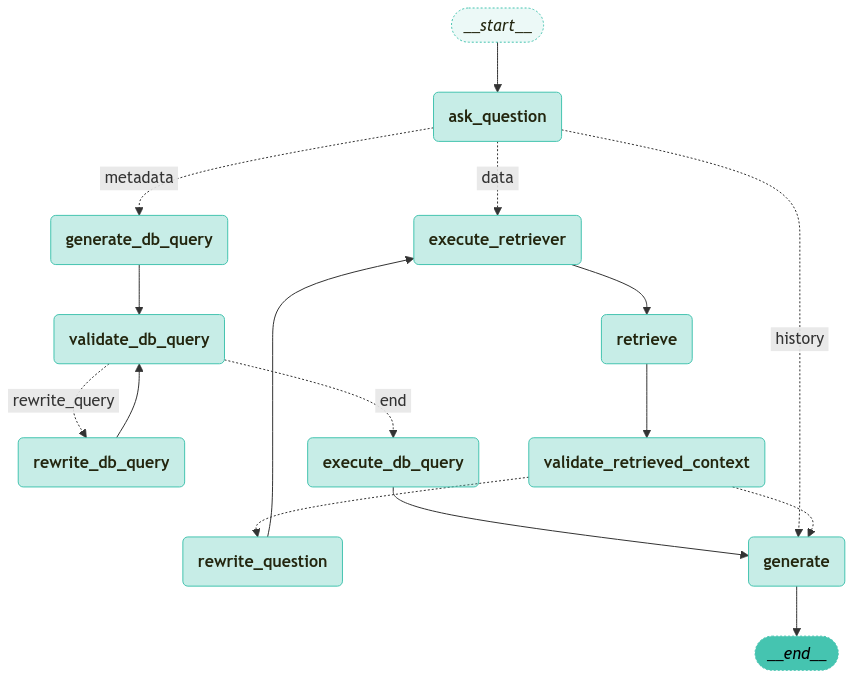

In [4]:
from langchain_teddynote.graphs import visualize_graph

visualize_graph(bot._graph)

In [4]:
snapshot = bot.get_snapshot()
snapshot.values["messages"]

[HumanMessage(content='이 채널에서 마약이 판매되는 지역은?', additional_kwargs={}, response_metadata={}, id='6730074a-a5d1-491f-924c-5430d1c6b574'),
 AIMessage(content='', additional_kwargs={'tool_calls': [{'index': 0, 'id': 'call_T6QGWG6rVcvGE3Dc0l6AH0ki', 'function': {'arguments': '{"query":"마약 판매 지역"}', 'name': 'retrieve_chats_in_telegram_channel'}, 'type': 'function'}]}, response_metadata={'finish_reason': 'stop', 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_eb9dce56a8'}, id='run-6c4692da-4d6f-4a8a-b32e-230d90a50926', tool_calls=[{'name': 'retrieve_chats_in_telegram_channel', 'args': {'query': '마약 판매 지역'}, 'id': 'call_T6QGWG6rVcvGE3Dc0l6AH0ki', 'type': 'tool_call'}]),
 ToolMessage(content='<document><context>-떨 부산 및 광주만 가능\n 전 지역 품절\n(재입고시 공지예정)</context><metadata><timestamp>2023-07-29 06:05:37</timestamp><url>https://t.me/frozen_talk/108</url><views>1005</views></metadata></document>\n\n<document><context>-부산 및 창원, 울산\n신규 브액 달토4 판매개시!\n타 지역은 조금 기다려 주세요</context><metadata><timesta

In [5]:
snapshot.config

{'configurable': {'thread_id': '955956081214299624',
  'checkpoint_ns': '',
  'checkpoint_id': '1eff125e-f3d3-68be-8005-1498f9ccea9b'}}

In [6]:
snapshot.values

{'messages': [HumanMessage(content='이 채널에서 마약이 판매되는 지역은?', additional_kwargs={}, response_metadata={}, id='6730074a-a5d1-491f-924c-5430d1c6b574'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'index': 0, 'id': 'call_T6QGWG6rVcvGE3Dc0l6AH0ki', 'function': {'arguments': '{"query":"마약 판매 지역"}', 'name': 'retrieve_chats_in_telegram_channel'}, 'type': 'function'}]}, response_metadata={'finish_reason': 'stop', 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_eb9dce56a8'}, id='run-6c4692da-4d6f-4a8a-b32e-230d90a50926', tool_calls=[{'name': 'retrieve_chats_in_telegram_channel', 'args': {'query': '마약 판매 지역'}, 'id': 'call_T6QGWG6rVcvGE3Dc0l6AH0ki', 'type': 'tool_call'}]),
  ToolMessage(content='<document><context>-떨 부산 및 광주만 가능\n 전 지역 품절\n(재입고시 공지예정)</context><metadata><timestamp>2023-07-29 06:05:37</timestamp><url>https://t.me/frozen_talk/108</url><views>1005</views></metadata></document>\n\n<document><context>-부산 및 창원, 울산\n신규 브액 달토4 판매개시!\n타 지역은 조금 기다려 주세요</context><me

In [8]:
from langchain import hub

hub.pull("teddynote/rag-prompt")

PromptTemplate(input_variables=['context', 'question'], input_types={}, partial_variables={}, metadata={'lc_hub_owner': 'teddynote', 'lc_hub_repo': 'rag-prompt', 'lc_hub_commit_hash': 'f42521f58f89165b1784695ac09ff4fb7b750dd7227b0aaf952521e91f629e88'}, template="You are an AI assistant specializing in Question-Answering (QA) tasks within a Retrieval-Augmented Generation (RAG) system. \nYour primary mission is to answer questions based on provided context or chat history.\nEnsure your response is concise and directly addresses the question without any additional narration.\n\n###\n\nYour final answer should be written concisely (but include important numerical values, technical terms, jargon, and names), followed by the source of the information.\n\n# Steps\n\n1. Carefully read and understand the context provided.\n2. Identify the key information related to the question within the context.\n3. Formulate a concise answer based on the relevant information.\n4. Ensure your final answer dir